## Mini Project III

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

Segmentation Using Demographics:
One approach to segment customers based on demographics would be to use variables such as age, gender, income, education, and marital status. A clustering algorithm such as k-means or hierarchical clustering could be used to group customers with similar demographic characteristics into 3-5 clusters.

In [15]:
customer_df = pd.read_csv('data/twm_customer.csv',delimiter=";")

In [16]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [17]:
customer_df.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'],
      dtype='object')

Identifying the demographic variables:
Commonly used Demographic varibales include: age, sex, income level, race, employment, location, homeownership, and level of education

In [18]:
demographic_vars = ['age', 'gender', 'income', 'name_prefix',  'years_with_bank', 'city_name', 'marital_status']
demographic_data = customer_df[demographic_vars]

In [19]:
demographic_data.head()

,age,gender,income,name_prefix,years_with_bank,city_name,marital_status
0,46,M,26150,,5,Las Vegas,2
1,71,M,6605,,1,Los Angeles,2
2,38,F,18548,,8,Los Angeles,1
3,54,F,47668,,3,Los Angeles,1
4,59,F,44554,,9,New York City,4


In [20]:
demographic_data.isna().sum()

age                0
gender             0
income             0
name_prefix        0
years_with_bank    0
city_name          0
marital_status     0
dtype: int64

In [21]:
demographic_data['gender'] = LabelEncoder().fit_transform(demographic_data['gender'])
demographic_data['name_prefix'] = LabelEncoder().fit_transform(demographic_data['name_prefix'].str.rstrip())
demographic_data['city_name'] = LabelEncoder().fit_transform(demographic_data['city_name'])
demographic_data['marital_status'] = LabelEncoder().fit_transform(demographic_data['marital_status'])

C:\Users\benny\AppData\Local\Temp\ipykernel_2436\3169427723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['gender'] = LabelEncoder().fit_transform(demographic_data['gender'])
C:\Users\benny\AppData\Local\Temp\ipykernel_2436\3169427723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['name_prefix'] = LabelEncoder().fit_transform(demographic_data['name_prefix'].str.rstrip())
C:\Users\benny\AppData\Local\Temp\ipykernel_2436\3169427723.py:3: SettingWithCopyWarning: 
A 

In [22]:
demographic_data.head()

,age,gender,income,name_prefix,years_with_bank,city_name,marital_status
0,46,1,26150,0,5,29,1
1,71,1,6605,0,1,32,1
2,38,0,18548,0,8,32,0
3,54,0,47668,0,3,32,0
4,59,0,44554,0,9,41,3


In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(demographic_data)

In [24]:
scaled_data

array([[ 0.18431237,  1.127172  ,  0.1541846 , ...,  0.40853922,
        -0.26047137,  0.13214882],
       [ 1.49307037,  1.127172  , -0.72652421, ..., -1.08743527,
        -0.08342668,  0.13214882],
       [-0.23449019, -0.88717605, -0.18836584, ...,  1.53052009,
        -0.08342668, -0.98961444],
       ...,
       [ 0.39371365,  1.127172  ,  1.73806357, ..., -1.4614289 ,
        -1.97190339,  0.13214882],
       [-0.28684051, -0.88717605, -0.34373468, ...,  1.15652647,
        -1.61781401,  0.13214882],
       [-1.28149658, -0.88717605, -0.21869161, ..., -0.33944803,
        -0.08342668, -0.98961444]])

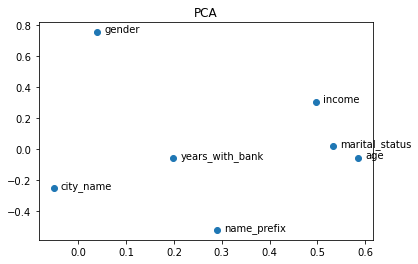

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(demographic_data.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(7,0), textcoords='offset points')
    


c:\Users\benny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


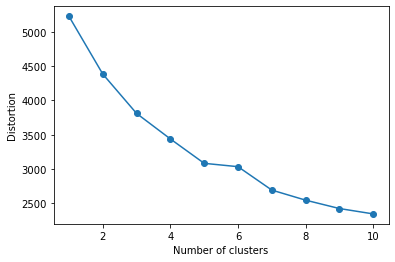

In [26]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=20,
        tol=1e-04, random_state=0
    )
    km.fit(scaled_data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, random_state=43).fit(scaled_data)

In [28]:
kmeans.cluster_centers_

array([[-0.95592348, -0.08464695, -0.59914139, -0.51796378, -0.15617625,
        -0.02112012, -0.75721727],
       [ 0.56442121,  0.36631771,  0.3774242 , -0.29494798,  0.09044138,
         0.04534767,  0.47355503],
       [ 0.25179521, -0.88717605,  0.08978424,  1.86367005,  0.0462329 ,
        -0.08895933,  0.12338504]])

In [29]:
k_labels = kmeans.labels_
new_columns = kmeans.predict(scaled_data)
new_cols = pd.DataFrame(new_columns)

In [30]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    plt.figure(figsize=(8, 6))
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

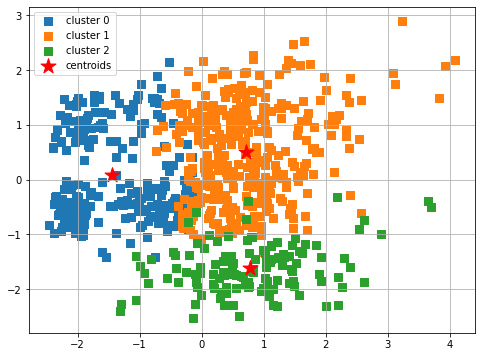

In [31]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(demographic_data)
new_df = pd.DataFrame(minmax_df, columns=demographic_data.columns.to_list())
final_df = pd.concat([new_df, new_cols], axis=1)
final_df.rename(columns={0:'cluster'}, inplace=True)
clusters = []
cluster_list = final_df['cluster'].unique().tolist()
cluster_list.sort()

for i in cluster_list:
    clusters.append(final_df[
                        final_df['cluster'] == i
                    ])

Radar Chart

In [33]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

categories = demographic_data.columns.to_list()

fig = go.Figure()

for cluster in clusters:
    #R computation
    r = []
    for i in categories:
        r.append(cluster[i].mean())
        
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=categories,
        fill='toself', name=f'Cluster {cluster.iloc[0,-1]}'))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.write_html("radar_1.html")

fig.show()